### Questions
- To test for interactions, run an experiment. 
- When you have an interaction you lose interpretability on the individual columns

### Objectives
YWBAT 
- explain bias/variance tradeoff
- explain ridge regression
- explain lasso regression
- explain AIC and BIC

### What are the assumptions of linear regression? 

**Features and Target**
- Linear Relationship between the features and the target
- Multicollinearity - features cannot have multicollinearity

**Assumptions on your Residuals**
- Normality Assumption
- Homoskedacicity - want this to be true of the residuals
- Autocorrelation - no correlation between features and residuals


### Keyterms
- lambda penalty parameter
- penalty size

### Outline

In [4]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/BNG_cholesterol.csv")
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,46.950938,1,1,165.981331,0,2,152.691434,0,1.774223,2,0,7,3,265.569780
1,47.359284,1,4,134.748286,0,2,132.079047,1,0.407640,2,0,7,0,269.368061
2,58.455787,1,4,129.456617,0,0,164.523754,1,5.284900,2,0,7,4,244.336917
3,56.070298,1,4,124.831749,0,2,181.453944,0,1.096476,1,1,7,2,237.985356
4,44.121116,1,4,109.887955,0,2,110.055090,1,0.437412,2,0,3,1,245.907334


In [3]:
features_to_use = ['exang', 'fbs', 'restecg', 'thal']
target = ['chol']

In [6]:
linreg = sm.OLS(df[target], df[df.drop(columns=['chol']).columns]).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chol   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          1.800e+06
Date:                Fri, 08 Nov 2019   Prob (F-statistic):                        0.00
Time:                        13:25:26   Log-Likelihood:                     -5.3515e+06
No. Observations:             1000000   AIC:                                  1.070e+07
Df Residuals:                  999987   BIC:                                  1.070e+07
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            1.4258      0.005    285.707      0.000       1.416       1.436
sex          -13.2932      0.115   -115.276      0.000     -13.519     -13.067
cp             5.8796      0.054    109.203      0.000       5.774       5.985
trestbps       0.6679      0.002    283.377      0.000       0.663       0.672
fbs            3.4092      0.142     24.068      0.000       3.132       3.687
restecg        7.3749      0.052    143.157      0.000       7.274       7.476
thalach        0.2956      0.002    159.151      0.000       0.292       0.299
exang          2.8243      0.118     23.995      0.000       2.594       3.055
oldpeak        0.2527      0.048      5.252      0.000       0.158       0.347
slope          2.3585      0.085     27.851      0.000       2.193       2.524
ca             7.0432      0.058    121.056      0.000       6.929       7.157
thal           1.6654      0.030     55.635      0.000       1.607       1.724
num            0.6076      0.043     14.289      0.000       0.524       0.691
==============================================================================
Omnibus:                    72929.043   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96856.071
Skew:                           0.648   Prob(JB):                         0.00
Kurtosis:                       3.803   Cond. No.                         576.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What is statsmodels doing under the hood to find the coefficients
- It's performing gradient descent

### In OLS as dimensions increase, what happens?
- Increase the complexity of the model
- Increase the possibility of multicollinearity
- Increase your chances of overfitting

### The problem with Gradient Descent, is...prone to overfitting, because all it wants to do is minimize error. 

# This is where we introduce a penalty $\lambda$ 

### The penalty will penalize your loss based on number of parameters of our model

Example

**Regular Loss Function**
    - MSE
    
**Penalized Loss Function L1-Lasso**

$$\lambda = \sum{\bar{\beta_i}}$$

    - MSE + `np.sum(np.abs(Beta_coeffients))`
    
**Penalized Loss Function L2 - Ridge**
 
$$\lambda =  \sum{\beta_i^2}$$

    - MSE + `np.sum(Beta_coeffients**2)`

### Ridge and Lasso regression effect our cost function

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [21]:
X = df.drop(columns=['chol', 'age', 'sex'])
y = df['chol']

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plot coefficients

In [14]:
cols = X.columns
coeffs = lr.coef_

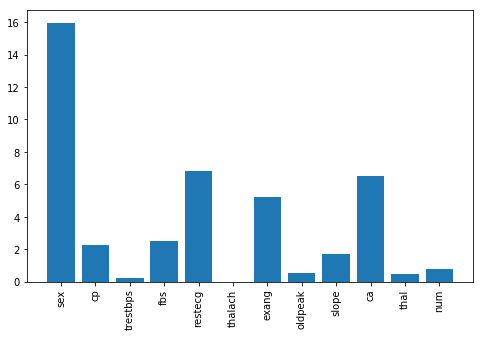

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.xticks(rotation=90)
plt.show()

## let's repeat this for Lasso Regression
- Fewer betas that are significant
- Smaller beta values from previous LR have disappeared

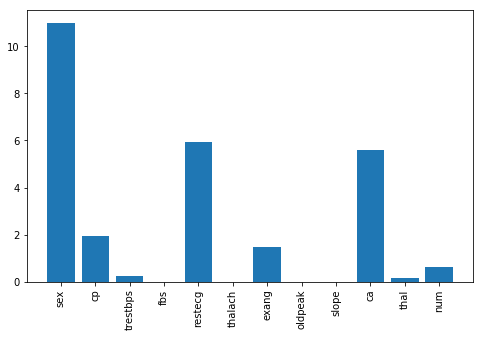

In [18]:
lr = Lasso()
lr.fit(X, y)

cols = X.columns
coeffs = lr.coef_

plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.xticks(rotation=90)
plt.show()

### let's repeat this for Ridge

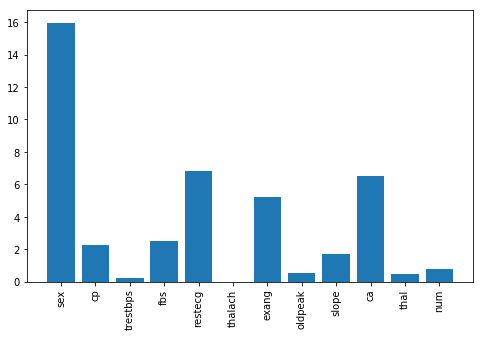

In [19]:
lr = Ridge()
lr.fit(X, y)

cols = X.columns
coeffs = lr.coef_

plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.xticks(rotation=90)
plt.show()

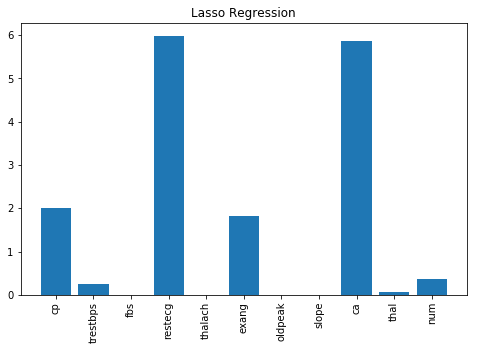

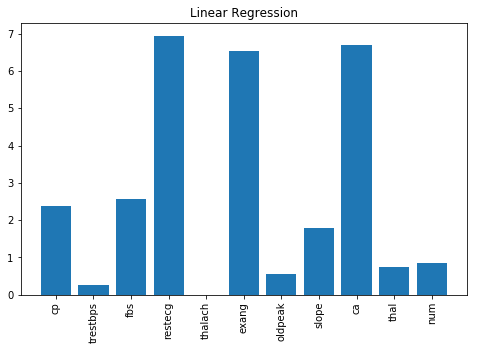

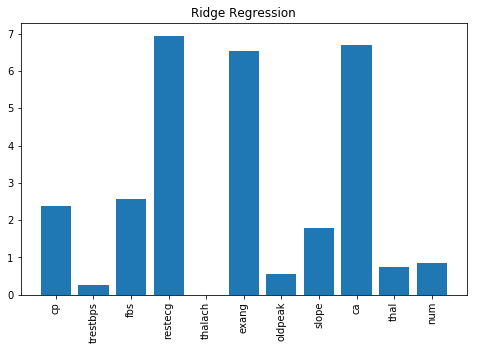

In [23]:
lr = Lasso()
lr.fit(X, y)

cols = X.columns
coeffs = lr.coef_

plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.title("Lasso Regression")
plt.xticks(rotation=90)
plt.show()

lr = LinearRegression()
lr.fit(X, y)

cols = X.columns
coeffs = lr.coef_

plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.xticks(rotation=90)
plt.title("Linear Regression")
plt.show()

lr = Ridge()
lr.fit(X, y)

cols = X.columns
coeffs = lr.coef_

plt.figure(figsize=(8, 5))
plt.bar(cols, np.abs(coeffs))
plt.title("Ridge Regression")
plt.xticks(rotation=90)
plt.show()

### Some Formulas

#### AIC/ BIC
![](images/aic-bic.jpg)


#### Lasso Regression
![](images/lasso.png)

#### Ridge Regression

![](images/ridge.jpg)



### Assessment

### What did we learn
- What is the difference between Ridge and Lasso?
    - Lasso penalizes with sum of abs values of parameters
    - Ridge penalizes with sum of square values of parameters
    - Lasso eliminates coefficients < 1
    - Ridge is more forgiving of smaller coefficients
- In general, you should standardize data and compare models as usual

In [24]:
coeffients = [6, 10, 2.4, 0.5, 0.2, 0.9, 0.52, 3]

l1 = np.sum(np.abs(coeffients))

l2 = np.sum(np.power(coeffients, 2))

l1, l2

(23.52, 152.13039999999998)

In [25]:
np.power(coeffients, 2)

array([3.600e+01, 1.000e+02, 5.760e+00, 2.500e-01, 4.000e-02, 8.100e-01,
       2.704e-01, 9.000e+00])